## Titanic - Exploratory Data Analysis

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 8),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

### Load the Data

In [68]:
train = pd.read_csv("assets/train.csv")
test = pd.read_csv("assets/test.csv")

### Get to Know the Data

Let's take a quick peek at the training dataset to get an idea of what sorts of features we are dealing with:

In [69]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Each row corresponds to one passenger on board the Titanic. There are basic personal characteristics, such as Age and Sex, as well as voyage information.

In [70]:
train.shape, test.shape

((891, 12), (418, 11))

The training dataset has 891 rows (observations) and 12 columns (features) while the test dataset has just under half the number of rows and 11 columns. This is a relatively small dataset.

In [71]:
train.columns.values, test.columns.values

(array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object),
 array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object))

In [72]:
set(train.columns.values) - set(test.columns.values)

{'Survived'}

The training and test datasets have the same columns except that the test dataset is missing the Survived feature (as expected - this is the target output that we are trying to predict).

### Data Dictionary

It's important to understand what each feature represents. Luckily, this dataset has been labeled clearly and it is obvious what type of information most of the columns contain.

* PassengerId - unique ID, not relevant
* Survived - target, what we are trying to predict
* Pclass - ticket class, (1-3 for 1st/2nd/3rd class)
* Name - text field for passenger name, including title
* Sex - passenger gender (male or female)
* SibSp - # of siblings or spouses onboard
* Parch - # of parents or children onboard
* Ticket - ticket number
* Fare - cost of ticket
* Cabin - cabin number
* Embarked - port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

#### Data Types & Missing Values

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We have several object (string) columns that we will need to deal with: Name, Sex, Ticket, Cabin and Embarked. The rest of the columns are numerical. The ```.info()``` method contains information about the data type of each column as well as the number of values contained within each column. Note we can look at each of these summaries separately, using ```.dtypes``` and ```.isnull()```:

In [74]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [75]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We will have to deal with missing values for Age, Cabin and Embarked.

### Basic Visuals

Histograms are a quick way to get an idea about the shape of the data. Let's start by looking at the survival distribution, i.e. how many people survived vs. perished. Below, we determine how many passengers fall into each category (Survived = 0 and Survived = 1) using ```value_counts()```; then we divide the number of survivors by the total number of passengers to get a survival rate.

In [76]:
train_survived = train["Survived"].value_counts()
train_survived

0    549
1    342
Name: Survived, dtype: int64

In [77]:
train_s_rate = train_survived[1] / train_survived.sum()
train_s_rate

0.3838383838383838

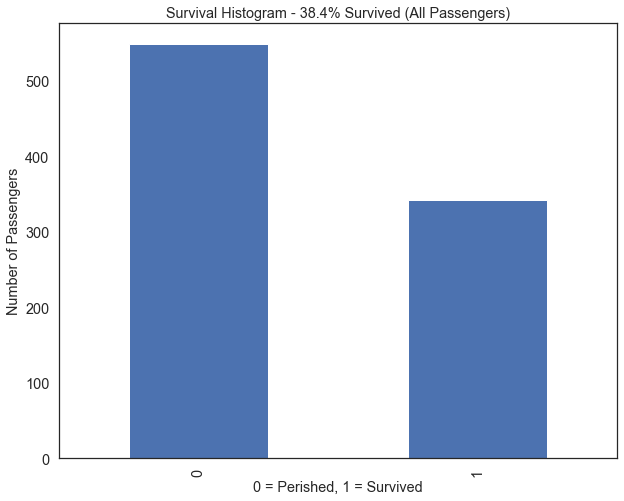

In [81]:
train_survived.plot(kind="bar")
plt.title("Survival Histogram - {:0.1%} Survived (All Passengers)".format(train_s_rate))
plt.ylabel("Number of Passengers")
plt.xlabel("0 = Perished, 1 = Survived")
plt.show()

Rather than calculating the percentage of passengers by hand, we can use the built in parameter ```normalize=True``` within our ```value_counts()``` method call. It can be easier to interpret percentages rather than whole numbers.

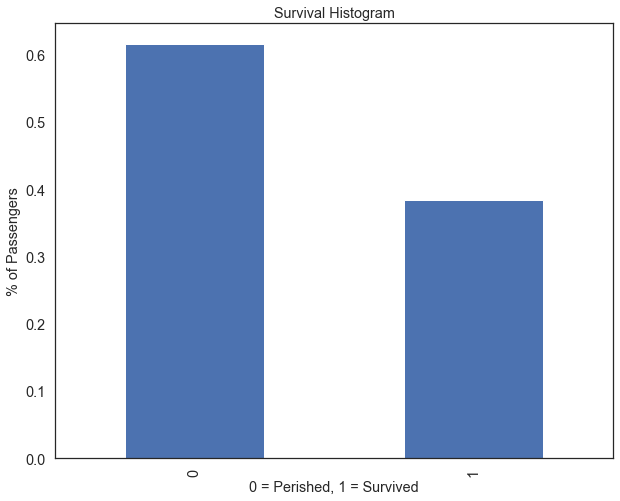

In [82]:
train["Survived"].value_counts(normalize=True).plot(kind="bar")

plt.title("Survival Histogram")
plt.ylabel("% of Passengers")
plt.xlabel("0 = Perished, 1 = Survived")

plt.show()

Only 38% of passengers survived.

We can also use histograms to look at the distributions of the other features:

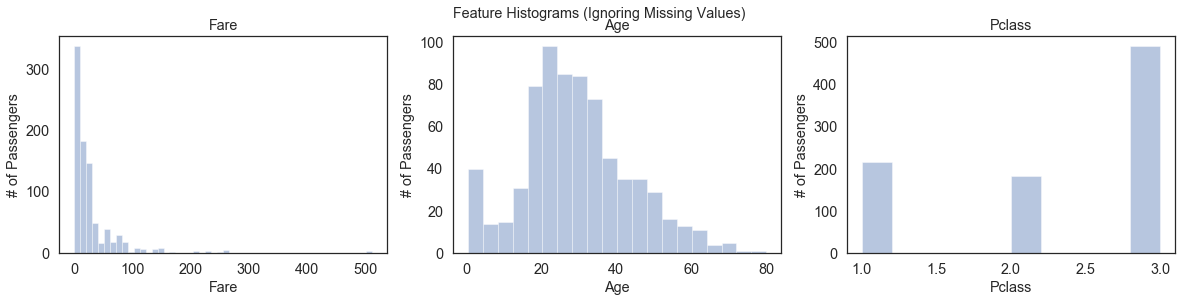

In [83]:
fig, axs = plt.subplots(1,3, figsize=(20,4))

for i, f in enumerate(["Fare", "Age", "Pclass"]):
    sns.distplot(train[f].dropna(), kde=False, ax=axs[i]).set_title(f)
    axs[i].set(ylabel="# of Passengers")

plt.suptitle("Feature Histograms (Ignoring Missing Values)")
plt.show()

The histograms above show that the majority of fares were less than 100 dollars. The majority of passengers were in the 20 to 40 age range and approximately the same number of passengers were in 3rd class as there were in 1st and 2nd class combined.

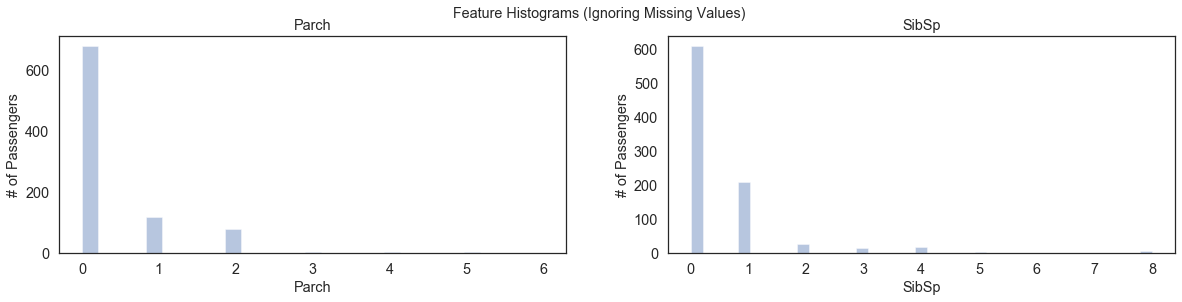

In [84]:
fig, axs = plt.subplots(1,2, figsize=(20,4))

for i, f in enumerate(["Parch", "SibSp"]):
    sns.distplot(train[f].dropna(), kde=False, ax=axs[i]).set_title(f)
    axs[i].set(ylabel="# of Passengers")

plt.suptitle("Feature Histograms (Ignoring Missing Values)")
plt.show()

Likewise, we see that most passengers traveled without parents, children, siblings or spouses.

A correlation matrix illustrates how variables move together. We see that Pclass has the highest negative correlation with Survived, followed by Parch; Fare is positively correlated.

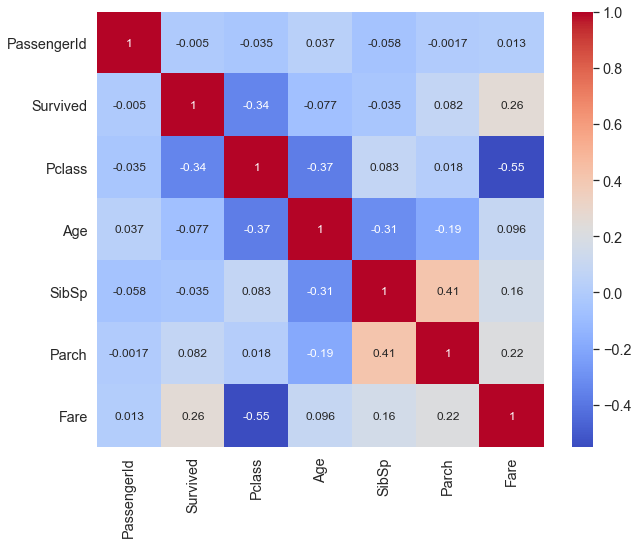

In [85]:
sns.heatmap(train.corr(), annot=True, cmap="coolwarm")
plt.show()

The correlation matrix contains a lot of information and can be difficult to interpret. Instead, we can view the correlation with a specific variable using the ```.corr()``` method:

In [86]:
train.corr()["Survived"].sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

### Feature Analysis

**Sex**

Sex was an important feature in deciding who survived. The graphs below correspond to the conditional probability of survival given a person's sex: $P(\text{survived } | \text{ male or female})$.

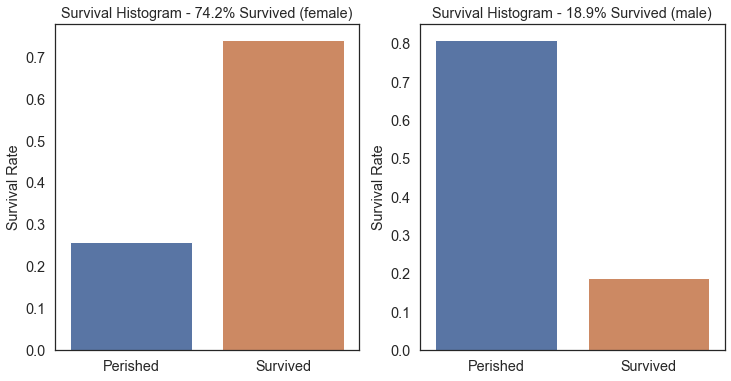

In [87]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))
for i, sex in enumerate(["female", "male"]):
    p = train[train["Sex"] == sex]["Survived"].value_counts(normalize=True).sort_index().to_frame().reset_index()
    sns.barplot(x=["Perished", "Survived"], y="Survived", data=p, hue="index", ax=axs[i], dodge=False)
    axs[i].set_title("Survival Histogram - {:0.1%} Survived ({})".format(p.loc[1,"Survived"], sex))
    axs[i].set_ylabel("Survival Rate")
    axs[i].get_legend().remove()

If we encode sex (0 for male or 1 for female) and look at the correlation with Survived, we confirm that these variables are highly correlated (compared to the other features in the dataset).

In [38]:
sex_map = {"male": 0, "female": 1}
sex_encoded = train["Sex"].map(sex_map)

sex_df = pd.DataFrame({"Sex_Encoded": sex_encoded, "Survived": train["Survived"]})
sex_df.corr()

,Sex_Encoded,Survived
Sex_Encoded,1.000000,0.543351
Survived,0.543351,1.000000


Now that we know that sex is an important factor, note that there were more males than females onboard.

In [39]:
n_male = len(train[train["Sex"] == "male"])
n_female = len(train[train["Sex"] == "female"])
"Males: {:.1%}, Females: {:.1%}".format(n_male / len(train), n_female / len(train))

'Males: 64.8%, Females: 35.2%'

**Passenger Class**

At this point, it's interesting to look at how survival varies based on passenger class. Option 1 is to construct individual plots by filtering for each passenger class:

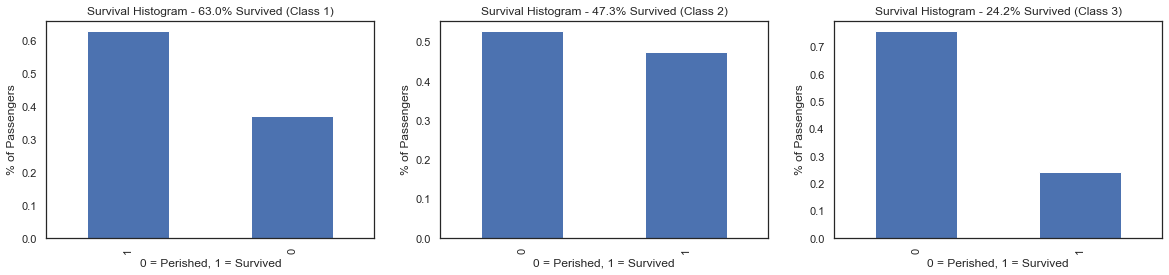

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(20,4))

for i, pclass in enumerate([1, 2, 3]):
    p = train[train["Pclass"] == pclass]["Survived"].value_counts(normalize=True)
    p.plot(kind="bar", ax=axs[i])
    axs[i].set_title("Survival Histogram - {:0.1%} Survived (Class {})".format(p[1], pclass))
    axs[i].set_ylabel("% of Passengers")
    axs[i].set_xlabel("0 = Perished, 1 = Survived")

Option 2 is to use the Seaborn ```catplot```, which is a much faster way of visualizing the relationship between variables:

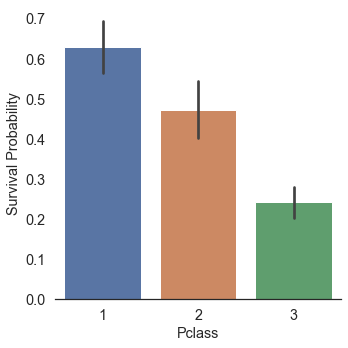

In [88]:
g = sns.catplot(x="Pclass", y="Survived", data=train, kind="bar")
g.despine(left=True)
g.set_ylabels("Survival Probability")
plt.show()

This plot reveals that passengers in classes 1 and 2 were more likely to survive than those in class 3. Specifically, 63% of first class passengers survived while only 24% of third class passengers survived.

**Siblings/Spouses**

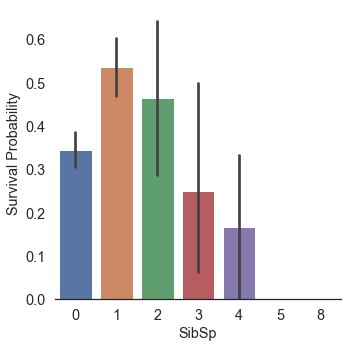

In [89]:
g = sns.catplot(x="SibSp", y="Survived", data=train, kind="bar")
g.despine(left=True)
g.set_ylabels("Survival Probability")
plt.show()

Likewise, passengers with 3 or 4 siblings/spouses have a lower chance to survive.

**Embarkation Location**

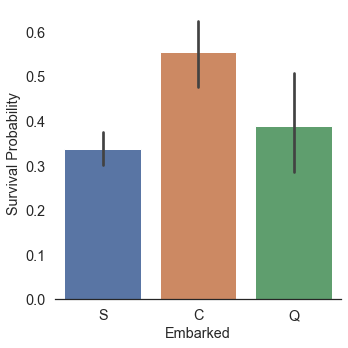

In [90]:
g = sns.catplot(x="Embarked", y="Survived", data=train, kind="bar")
g.despine(left=True)
g.set_ylabels("Survival Probability")
plt.show()

Passengers from Cherbourg (C) have the higher probability of surviving. If we plot the distribution of passenger class for each port, we see that a large number of passengers in class 1 embarked at port C.

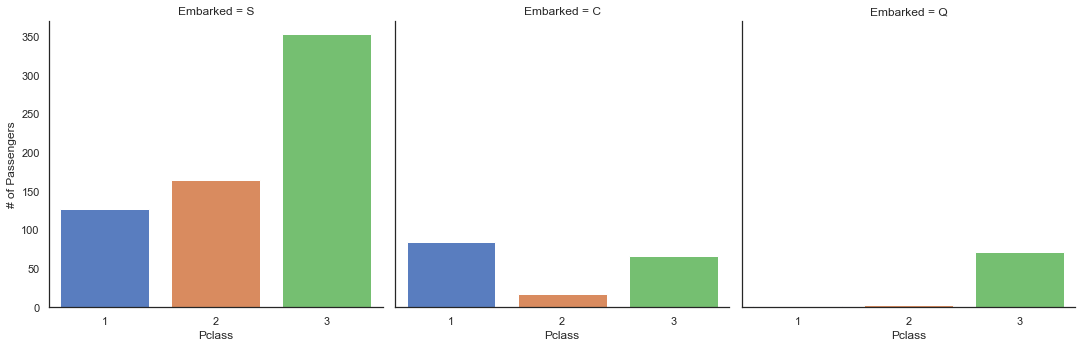

In [44]:
g = sns.catplot("Pclass", col="Embarked",  data=train, kind="count", palette="muted")
g = g.set_ylabels("# of Passengers")

**Parents/Children**

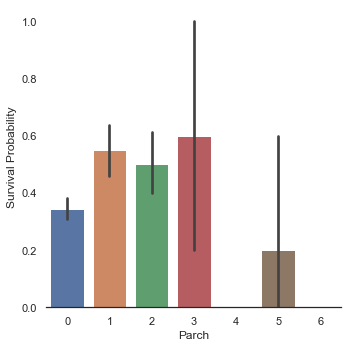

In [45]:
g = sns.catplot(x="Parch", y="Survived", data=train, kind="bar")
g.despine(left=True)
g.set_ylabels("Survival Probability")
plt.show()

The relationship between Parch and survival is less clear. Notice the large standard deviations associated with Parch = 3 and Parch = 5.

**Age**

Age also factors into survival rate and indeed the age distributions are not the same for the survived/perished populations. The dual density plot below shows that very young passengers had a higher chance to survive.

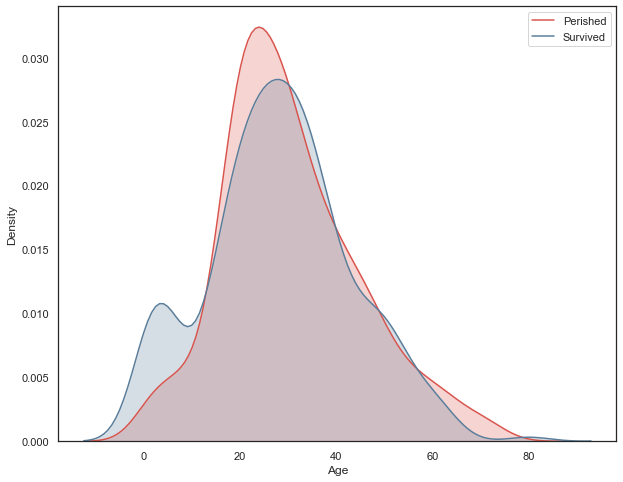

In [46]:
g = sns.kdeplot(train["Age"][train["Survived"] == 0], label="Perished", shade=True, color=sns.xkcd_rgb["pale red"])
g = sns.kdeplot(train["Age"][train["Survived"] == 1], label="Survived", shade=True, color=sns.xkcd_rgb["steel blue"])
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

We can also view the density plots separately using a ```FacetGrid```.

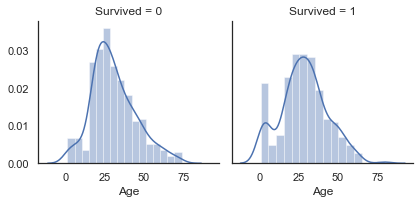

In [47]:
g = sns.FacetGrid(train, col="Survived")
g = g.map(sns.distplot, "Age")

Underage children make up a significant percentage of the people onboard. For example, there are 100 passengers under the age of 18 and 180 passengers under the age of 21.

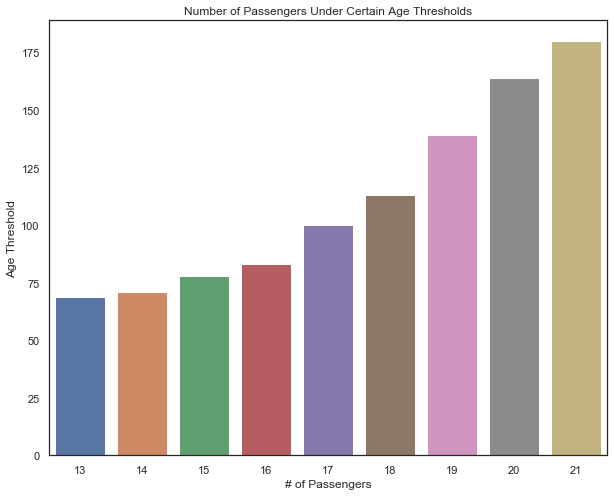

In [48]:
child_ages = [13, 14, 15, 16, 17, 18, 19, 20, 21]
num_children = []
for i in child_ages:
    num_children.append(len(train[train["Age"] < i]))
                        
g = sns.barplot(x=child_ages, y=num_children)
plt.xlabel("# of Passengers")
plt.ylabel("Age Threshold")
plt.title("Number of Passengers Under Certain Age Thresholds")
plt.show()